# Chocolate at a Glance:
<b>Chocolate</b> is an all time favorite sweet for a sizeable portion of the world.  It comes from the combination of several ingredients mixed with <b>cocoa seeds</b>, and can be found in liquid, paste, or block/bar form.  In this report we'll be taking a look at data gathered through nearly 1,800 expert ratings of chocolate bars, and form a few hypothesis based on factors and values!

In [8]:
#IMPORTS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sb

In [31]:
# Connect to database:
conn = sqlite3.connect('chocolateBars.db')
# Read the data:
chocolateBars = pd.read_csv('flavors_of_cacao_ADJUSTED.csv')
# Populate chocolateBars database:
chocolateBars.to_sql('chocolateBars', conn, if_exists = 'replace')
# While we're at it, let's make a variable that we'll use to read the queries:
read = pd.read_sql_query

Let's look at our factors and values in an example:

In [39]:
read("""
    SELECT * FROM chocolateBars
    LIMIT 1;
""", conn)

,index,Company,Bar_Name,REF,Review_Date,Cocoa_Percentage,Company_Location,Rating,Bean_Type,Bean_Origin
0,0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,None,Sao Tome


Mostly we'll take note of company names/location, the cocoa percentage, the rating, bean type, and the origin.  

# Rating Guide

Just like wine, chocolate has "professional tasters".  The taste tests are based off flavor, texture, aftermelt, and overall <b>opinion</b>.  Make sure you understand that the ratings are purely subjective, thus the rating would most likely be inconsistant with a different group of tasters.

Here directly from the source's website is an explaination of each rounded rating:
    <ul>5= Elite (Transcending beyond the ordinary limits)</ul></ul>
    <ul>4= Premium (Superior flavor development, character and style)</ul>
    <ul>3= Satisfactory(3.0) to praiseworthy(3.75) (well made with special qualities)</ul>
    <ul>2= Disappointing (Passable but contains at least one significant flaw)</ul>
    <ul>1= Unpleasant (mostly unpalatable)</ul>

  # Questions!
  
  

#### <ul><i>Where is the best place to farm sought after beans?</i></ul>
    
#### <ul><i>What type of bean is most often in higher rated chocolate?</i></ul>
    
#### <ul><i>What cocoa percentage is the right amount?</i></ul>

There are a lot of questions that we could ask while assessing this data, however we will cover these three in this report.

# Bean Origin VS. Rating

Surely the chocolate with the highest satifaction comes from well grown cocoa trees!  The soil contents, pH levels (6 is ideal), and the depth of the soil are important to a healthy cocoa tree.  These qualities vary for different areas very often, so knowing where they were grown is key.

In [137]:
origin_count = ([read("""
    SELECT DISTINCT bean_origin FROM chocolateBars;
""", conn)])
for i in origin_count:
    print("There are " + str(len(i)) + " unique areas listed in the 1,795 ratings (one being a blank spot for all the unkown locations).")

There are 101 unique areas listed in the 1,795 ratings (one being a blank spot for all the unkown locations).


In [176]:
nulled = ([read("""
    SELECT * FROM chocolateBars
    WHERE bean_origin LIKE '_';
""", conn)])
for i in nulled:
    print("There are " + str(len(i)) + " empty origins in the dataset.  This should not heavily affect our findings.")

There are 73 empty origins in the dataset.  This should not heavily affect our findings.


Our plot will show us the country names, and the amount of 4+ star ratings it has.  This will most likely indicate which country grows the best beans.

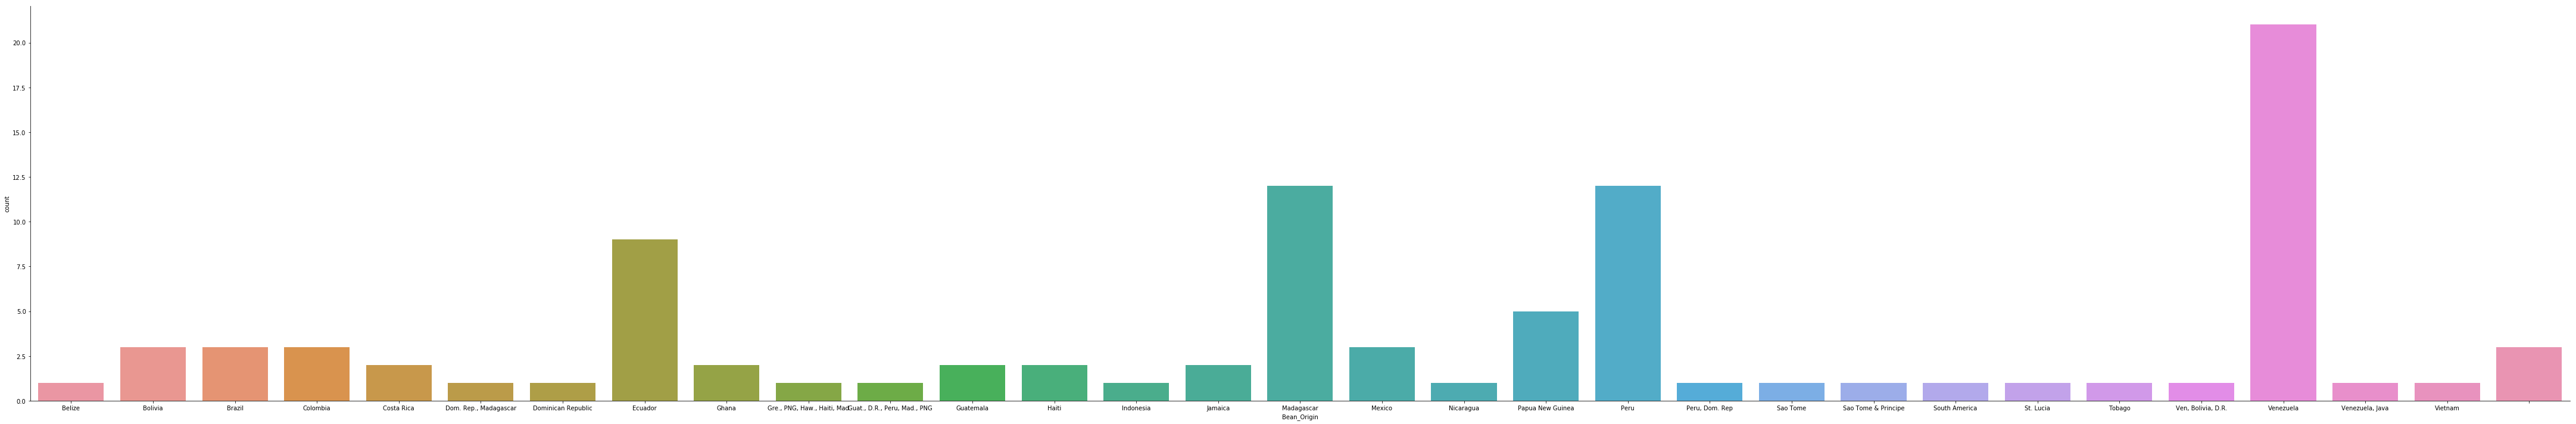

In [242]:
count = pd.read_sql_query("""
    SELECT Bean_Origin FROM chocolateBars
    WHERE Rating >= 4
    ORDER BY Bean_Origin;
""", conn)
sb.catplot(
    x = "Bean_Origin",
    data= count,
    kind = "count",
    height= 10,
    aspect= 6
)

Although Peru, Madagascar, and Ecuador have 10 or more 4 star ratings, Venezuela dominates all that stand before it.  It can be assumed through this chart that Venezuela would be the best place for one to choose a farming location.

# Cocao Percentage VS. Rating